# Характеристики случайной величины. Практика

## Цели практической работы
1. Применить на практике знания о характеристиках случайных величин.
2. Освежить знания о свойствах математического ожидания и дисперсии
3. Провести сравнительный анализ двух случайных величин на основе знаний об их
   характеристиках

## Что входит в практическую работу
  3 практические задачи

## Задача 1

Пусть случайная величина $X$ принимает такие значения:

- $1$ c вероятностью $3/5$;

- $2$ c вероятностью $1/5$;

- $3$ c вероятностью $1/5$.

Пропишите в явном виде:
- функцию вероятностей в точках $1, 2, 3$ \\
- функцию распределения в точках $1, 2, 3$ \\
- матожидание $X$ \\
- дисперсию $X$ \\
- стандартное отклонение $X$ \\
- медиану $X$ \\
- моду $X$



In [87]:
# Ваше решение
import numpy as np
X_values = [1, 2, 3]
X_probs = [3/5, 1/5, 1/5]
#X = dict([(1,3/5), (2,1/5), (3,1/5)])
X = dict(zip(X_values,X_probs))
X

{1: 0.6, 2: 0.2, 3: 0.2}

In [94]:
from collections import Counter

# функция вероятностей в точках 1,2,3
def prob_X(x, X):
  return X.get(x,0)

# функция распределения в точках 1,2,3
def prob_distr_func(value, X):
  X_values = list(X.keys())
  X_probs = list(X.values())

  if value < min(X):
    return 0
  elif value in X.keys():
    return  sum(X_probs[:X_values.index(value)+1])
  else:
    return 1.

# матожидание X
def mean_values(X):
  X_values = np.array(list(X.keys()))
  X_probs = np.array(list(X.values()))
  return  np.dot(X_values,X_probs)


# дисперсия X
def variance_(X):
  mean_ = mean_values(X)
  X_values = np.array(list(X.keys()))
  X_probs = np.array(list(X.values()))
  return  np.dot((X_values - mean_)**2,X_probs)

# стандартное отклонение X
def std_(X):
  return np.sqrt(variance_(X))

# медиана  X/ Не знаю что писать
# def mediana_(X):
#   len(list(X.keys()))



# мода X - значение случайной величины с максимальной вероятностью
def moda_sl_val(X):
  return max(X, key=X.get)

# мода выборки из X. Выборку сгенерим ниже
def moda_(sample_):
  d = Counter(sample_)
  return max(d, key=d.get)

# медиана выборки из X
def mediana_(sample_):
  lst = sorted(sample_)
  mean_index = len(lst)//2
  return lst[mean_index]

In [103]:
# случайная величина задана словарем
X = dict([(1,3/5), (2,1/5), (3,1/5)])


print('функция вероятностей: ', [prob_X(x, X) for x in range(-1,5)])

print('функция распределения в точках 1,2,3:', [prob_distr_func(x, X) for x in range(-1,5)] )

print('матожидание X:', mean_values(X))

print('дисперсия X:', variance_(X))

print('стандартное отклонение X:', std_(X))

#print('медиана  X:', mediana_(X))

print('мода X - значение случайной величины с максимальной вероятностью:', moda_sl_val(X))

# сгенерим выборку с помощью метода numpy random.choice
sample_ = np.random.choice([1, 2, 3], size=(10,), p=[0.6, 0.2, 0.2])
print('Выборка 10 значений случайной величины X:', sample_)

print('мода выборки из X:', moda_(sample_))

print('медиана выборки из X: ', mediana_(sample_))

функция вероятностей:  [0, 0, 0.6, 0.2, 0.2, 0]
функция распределения в точках 1,2,3: [0, 0, 0.6, 0.8, 1.0, 1.0]
матожидание X: 1.6
дисперсия X: 0.64
стандартное отклонение X: 0.8
мода X - значение случайной величины с максимальной вероятностью: 1
Выборка 10 значений случайной величины X: [1 1 1 2 2 3 1 1 1 2]
мода выборки из X: 1
медиана выборки из X:  1


In [104]:
# случайная величина задана словарем/ Какое матожидание у этой случайной величины?
X = dict([(10,0.3), (20,0.2), (-30,0.1), (40,0.2), (50,0.2)])
print('матожидание X:', mean_values(X))

матожидание X: 22.0


Стандартное отклонение случайной величины равно пяти. Какова дисперсия этой случайной величины?

Представьте, что вероятность забить гол составляет 0,8, а футболист нанёс 50 ударов. Каково матожидание числа голов, забитых футболистом в ворота?

In [105]:
X = dict([(1,0.8), (0,0.2)])
print('матожидание X:', mean_values(X))

матожидание X: 0.8


На графике представлено количество студентов, получивших за экзамен оценку от двойки до пятёрки. Какая средняя оценка студентов за экзамен?
Пояснение: всего студентов: 6 + 8 + 9 + 4 = 27. Поэтому соответствующие вероятности оценок — 6 / 27, 8 / 27, 9 / 27, 4 / 27. Тогда матожидание равно 2 × 6 / 27 + 3 × 8 / 27 + 4 × 9 / 27 + 5 × 4 / 27 ~ 3,4.

In [108]:
# случайная величина (оценка студентов за экзамен) задана словарем
X = dict([(2,6/27), (3,8/27), (4,9/27), (5,4/27)])
print('матожидание X:', mean_values(X))

матожидание X: 3.4074074074074074


Рассмотрите график из предыдущей задачи. Какова мода этой случайной величины?

In [110]:
# случайная величина (оценка студентов за экзамен) задана словарем
X = dict([(2,6/27), (3,8/27), (4,9/27), (5,4/27)])
print('мода X - значение случайной величины с максимальной вероятностью:', moda_sl_val(X))

мода X - значение случайной величины с максимальной вероятностью: 4


Пусть случайная величина принимает три значения: x1 = 1, x2 = 2, x3 = 3, каждое с вероятностью ⅓. Какова дисперсия такой случайной величины? Укажите ответ в десятичных дробях. Округлите ответ для дисперсии до одного знака.

In [109]:
# случайная величина задана словарем
X = dict([(1,1/3), (2,1/3), (3,1/3)])
print('дисперсия X:', variance_(X))

дисперсия X: 0.6666666666666666


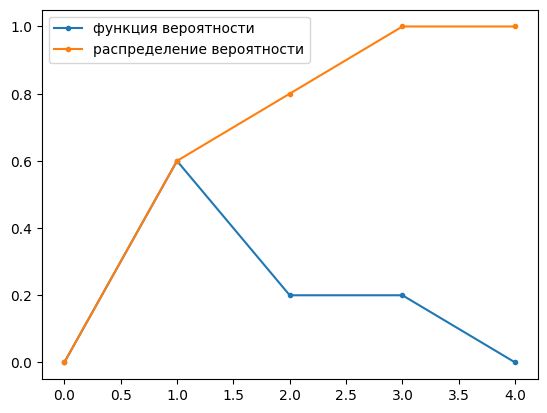

In [ ]:
import matplotlib.pyplot as plt

X = dict([(1,3/5), (2,1/5), (3,1/5)])
plt.plot([Prob_X(i, X) for i in range(0, 5)],'.-',  label='функция вероятностей')
plt.plot([Prob_distr_func(i, X) for i in range(0, 5)],'.-', label='распределение вероятности')
plt.legend()
plt.show()

### Задача 2.  

Случайная величина $A$ — линейная комбинация случайных величин $X, Y, Z.$ \\

$$A = 3X + 5Y – 7Z$$

\

1.Известно, что матожидания $X, Y, Z$ равны $M(X) = 2, \  M(Y) = 4, \ M(Z) = 6.$ \
Найдите матожидание $A.$ \\

2.Известно, что дисперсии $X, Y, Z$ равны $D(X) = 1, \ D(Y) = 1, \ D(Z) = 1$ и $ X, Y, Z$ — независимы. \
Найдите дисперсию $A$ и среднеквадратичное отклонение $A.$

###Подсказка.
Воспользуйтесь свойствами математического ожидания и дисперсии:

- $M(X + Y) = MX + MY$ — для случайных величин $X,Y$ с конечными матожиданиями.
- $M(aX) = aMX$ — для случайной величины $X$ и вещественного $a$.


- $D(X + Y) = DX + DY$ — для независимых случайных величин $X,Y$.
- $D(aX) = a^2 DX$ — для случайной величины $X$ и вещественного $a$.




In [ ]:
# Ваше решение
# матожидание A: M(A) := M_A = M(3*X + 5*Y - 7*Z) = 3*M_X + 5*M_Y - 7*M_Z
M_X = 2
M_Y = 4
M_Z = 6
M_A = 3*M_X + 5*M_Y - 7*M_Z
M_A

-16

### Задача 3.  

Предположим, что существует два интернет-магазина одежды. В каждом из них несколько лет фиксировалось число покупок за месяц. На основе этой информации получились две выборки. Известны значения характеристик матожидания, моды и дисперсии:

$EX_{1} = 20, DX_{1} = 16,$ мода($X_{1}) = 30.$

$EX_{2} = 10, DX_{2} = 3,$ мода($X_{2}) = 16.$

Какие выводы можно сделать по этой информации? Ответ запишите текстом.

#Решение
Исходя из предоставленных данных, можно сделать следующие выводы:

В первом интернет-магазине средний чек включает 20 товаров, а во втором - 10 товаров. <br>
Средний чек в первом магазине выше, чем во втором.<br>
Дисперсия в первом магазине больше, чем во втором (т.к. DX1 = 16, а DX2 = 3).<br>
Мода в первом магазине также выше, чем мода во втором (30 и 16 соответственно).
В обоих магазинах мода больше объема среднего чека.



# Решение:

Мы видим, что матожидание купленных товаров в первом магазине выше, чем во втором. Также в магазинах отличается и разброс.
В первом магазине он составляет 16, а значит в какие-то дни популярность выше, чем в другие. Во втором магазине разброс числа покупок небольшой.

Обратим внимание на моду:
в первом магазине наиболее вероятное число покупок — 30, в то же время во втором — 16. На этом основании можно предположить, что в первом магазине в целом покупают чаще, но спрос не стабилен и зависит от периода.
Второй магазин более стабилен: в среднем в месяц в нём осуществляется 10 покупок, разброс значений от этого числа небольшой.